In [1]:
# Import stuff
import pandas as p
import numpy as np
from matplotlib import pyplot as pp
import seaborn as s
import stats
import math

In [2]:
# get data set
iris = p.read_csv('../../Notes/data/iris.data', header=None, 
                   names=['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'class'])

In [3]:
# display data
iris

,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [4]:
"""
#4 implementation;

The 6 scatter plots needed are as follows:
==========================================
1 ~> Sepal_length vs Sepal_width
2 ~> Sepal_length vs Petal_length
3 ~> Sepal_length vs Petal_width
4 ~> Sepal_width vs Petal_length
5 ~> Sepal_width vs Petal_width
6 ~> Petal_length vs Petal_width
==========================================
"""
# Split data into 2 sets without taking class into consideration
sepal = p.DataFrame()
petal = p.DataFrame()

sepal[['L', 'W', 'C']] = iris[['sepal_length', 'sepal_width', 'class']]
petal[['L', 'W', 'C']] = iris[['petal_length', 'petal_width', 'class']]

# Split data into 3 smaller sets by the classes 
setosa = iris[iris['class'] == 'Iris-setosa']
virginica = iris[iris['class'] == 'Iris-virginica'].reset_index()
versicolor = iris[iris['class'] == 'Iris-versicolor'].reset_index()

Correlation between Sepal Length & Width ~> -0.10936924995064935
Correlation between Sepal & Petal Length ~> 0.8717541573048718
Correlation between Sepal Length & Petal Width ~> 0.8179536333691633
Correlation between Sepal Width & Petal Length ~> -0.42051609640115495
Correlation between Sepal & Petal Width ~> -0.3565440896138055
Correlation between Petal Length & Width ~> 0.9627570970509667


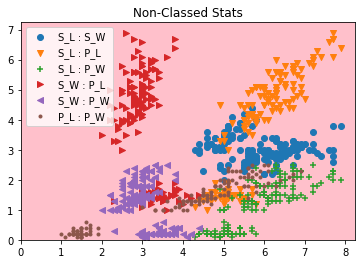

In [17]:
#no class plot/stats; #4 A)

#plot the 6 different data comparisons
pp.scatter(x = sepal['L'], y = sepal['W'])
pp.scatter(x = sepal['L'], y = petal['L'], marker = 'v')
pp.scatter(x = sepal['L'], y = petal['W'], marker = '+')
pp.scatter(x = sepal['W'], y = petal['L'], marker = '>')
pp.scatter(x = sepal['W'], y = petal['W'], marker = '<')
pp.scatter(x = petal['L'], y = petal['W'], marker = '.')
pp.title("Non-Classed Stats")
pp.legend(['S_L : S_W', 'S_L : P_L', 'S_L : P_W', 'S_W : P_L', 'S_W : P_W', 'P_L : P_W'])
pp.xlim(left = 0) # start axis at 0
pp.ylim(bottom = 0)
pp.gca().set_facecolor('pink')

#determine correlation between all of them using stats.py library
corrS = stats.corr(sepal['L'], sepal['W'])
print(f'Correlation between Sepal Length & Width ~> {corrS}')

corrSLPL = stats.corr(sepal['L'], petal['L'])
print(f'Correlation between Sepal & Petal Length ~> {corrSLPL}')

corrSLPW = stats.corr(sepal['L'], petal['W'])
print(f'Correlation between Sepal Length & Petal Width ~> {corrSLPW}')

corrSWPL = stats.corr(sepal['W'], petal['L'])
print(f'Correlation between Sepal Width & Petal Length ~> {corrSWPL}')

corrSWPW = stats.corr(sepal['W'], petal['W'])
print(f'Correlation between Sepal & Petal Width ~> {corrSWPW}')

corrP = stats.corr(petal['L'], petal['W'])
print(f'Correlation between Petal Length & Width ~> {corrP}')

Correlation between Setosa Sepal Length & Width ~> 0.7467803732639269
Correlation between Virginica Sepal Length & Width ~> 0.4572278163941129
Correlation between Versicolor Sepal Length & Width ~> 0.5259107172828243


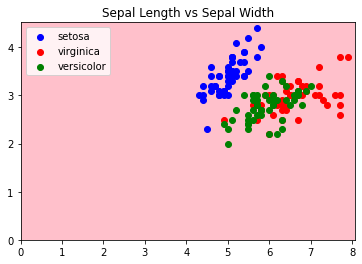

In [6]:
# begin #4 B)

# sepal_length vs sepal_width class
pp.scatter(x = setosa['sepal_length'], y = setosa['sepal_width'], color = 'b')
pp.scatter(x = virginica['sepal_length'], y = virginica['sepal_width'], color = 'r')
pp.scatter(x = versicolor ['sepal_length'], y = versicolor ['sepal_width'], color = 'g')
pp.title("Sepal Length vs Sepal Width")
pp.legend(['setosa', 'virginica', 'versicolor'])
pp.xlim(left = 0)
pp.ylim(bottom = 0)
pp.gca().set_facecolor('pink')

corrSS = stats.corr(setosa['sepal_length'], setosa['sepal_width'])
print(f'Correlation between Setosa Sepal Length & Width ~> {corrSS}')

corrSVI = virginica['sepal_length'].corr(virginica['sepal_width'])
print(f'Correlation between Virginica Sepal Length & Width ~> {corrSVI}')

corrSVE = versicolor['sepal_length'].corr(versicolor['sepal_width'])
print(f'Correlation between Versicolor Sepal Length & Width ~> {corrSVE}')

Correlation between Setosa Sepal & Petal Length ~> 0.2638740929186869
Correlation between Virginica Sepal & Petal Length ~> 0.8642247329355764
Correlation between Versicolor Sepal & Petal Length ~> 0.754048958592016


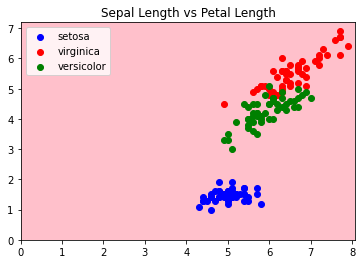

In [7]:
# sepal_length vs petal_length class
pp.scatter(x = setosa['sepal_length'], y = setosa['petal_length'], color = 'b')
pp.scatter(x = virginica['sepal_length'], y = virginica['petal_length'], color = 'r')
pp.scatter(x = versicolor ['sepal_length'], y = versicolor ['petal_length'], color = 'g')
pp.title("Sepal Length vs Petal Length")
pp.legend(['setosa', 'virginica', 'versicolor'])
pp.xlim(left = 0)
pp.ylim(bottom = 0)
pp.gca().set_facecolor('pink')

corrSS = stats.corr(setosa['sepal_length'], setosa['petal_length'])
print(f'Correlation between Setosa Sepal & Petal Length ~> {corrSS}')

corrSVI = virginica['sepal_length'].corr(virginica['petal_length'])
print(f'Correlation between Virginica Sepal & Petal Length ~> {corrSVI}')

corrSVE = versicolor['sepal_length'].corr(versicolor['petal_length'])
print(f'Correlation between Versicolor Sepal & Petal Length ~> {corrSVE}')

Correlation between Setosa Sepal Length & Petal Width ~> 0.2790915749995968
Correlation between Virginica Sepal Length & Petal Width ~> 0.28110770915731925
Correlation between Versicolor Sepal Length & Petal Width ~> 0.5464610715986299


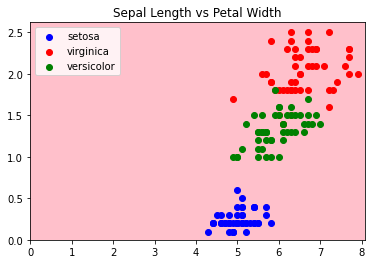

In [8]:
# sepal_length vs petal_width class
pp.scatter(x = setosa['sepal_length'], y = setosa['petal_width'], color = 'b')
pp.scatter(x = virginica['sepal_length'], y = virginica['petal_width'], color = 'r')
pp.scatter(x = versicolor ['sepal_length'], y = versicolor ['petal_width'], color = 'g')
pp.title("Sepal Length vs Petal Width")
pp.legend(['setosa', 'virginica', 'versicolor'])
pp.xlim(left = 0)
pp.ylim(bottom = 0)
pp.gca().set_facecolor('pink')

corrSS = stats.corr(setosa['sepal_length'], setosa['petal_width'])
print(f'Correlation between Setosa Sepal Length & Petal Width ~> {corrSS}')

corrSVI = virginica['sepal_length'].corr(virginica['petal_width'])
print(f'Correlation between Virginica Sepal Length & Petal Width ~> {corrSVI}')

corrSVE = versicolor['sepal_length'].corr(versicolor['petal_width'])
print(f'Correlation between Versicolor Sepal Length & Petal Width ~> {corrSVE}')

Correlation between Setosa Sepal Width & Petal Length ~> 0.17669462869680694
Correlation between Virginica Sepal Width & Petal Length ~> 0.4010445773427851
Correlation between Versicolor Sepal Width & Petal Length ~> 0.560522091692982


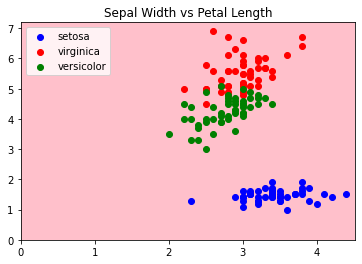

In [9]:
# sepal_width vs petal_length class
pp.scatter(x = setosa['sepal_width'], y = setosa['petal_length'], color = 'b')
pp.scatter(x = virginica['sepal_width'], y = virginica['petal_length'], color = 'r')
pp.scatter(x = versicolor ['sepal_width'], y = versicolor ['petal_length'], color = 'g')
pp.title("Sepal Width vs Petal Length")
pp.legend(['setosa', 'virginica', 'versicolor'])
pp.xlim(left = 0)
pp.ylim(bottom = 0)
pp.gca().set_facecolor('pink')

corrSS = stats.corr(setosa['sepal_width'], setosa['petal_length'])
print(f'Correlation between Setosa Sepal Width & Petal Length ~> {corrSS}')

corrSVI = stats.corr(virginica['sepal_width'], virginica['petal_length'])
print(f'Correlation between Virginica Sepal Width & Petal Length ~> {corrSVI}')

corrSVE = stats.corr(versicolor['sepal_width'], versicolor['petal_length'])
print(f'Correlation between Versicolor Sepal Width & Petal Length ~> {corrSVE}')

Correlation between Setosa Sepal & Petal Width ~> 0.27997288851690444
Correlation between Virginica Sepal & Petal Width ~> 0.8642247329355761
Correlation between Versicolor Sepal & Petal Width ~> 0.754048958592016


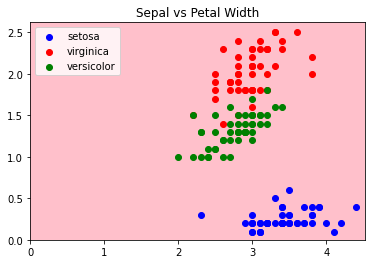

In [10]:
# sepal_width vs petal_width class
pp.scatter(x = setosa['sepal_width'], y = setosa['petal_width'], color = 'b')
pp.scatter(x = virginica['sepal_width'], y = virginica['petal_width'], color = 'r')
pp.scatter(x = versicolor ['sepal_width'], y = versicolor ['petal_width'], color = 'g')
pp.title("Sepal vs Petal Width")
pp.legend(['setosa', 'virginica', 'versicolor'])
pp.xlim(left = 0)
pp.ylim(bottom = 0)
pp.gca().set_facecolor('pink')

corrSS = stats.corr(setosa['sepal_width'], setosa['petal_width'])
print(f'Correlation between Setosa Sepal & Petal Width ~> {corrSS}')

corrSVI = stats.corr(virginica['sepal_length'], virginica['petal_length'])
print(f'Correlation between Virginica Sepal & Petal Width ~> {corrSVI}')

corrSVE = stats.corr(versicolor['sepal_length'], versicolor['petal_length'])
print(f'Correlation between Versicolor Sepal & Petal Width ~> {corrSVE}')

Correlation between Setosa Petal Length & Width ~> 0.3063082111580356
Correlation between Virginica Petal Length & Width ~> 0.8642247329355761
Correlation between Versicolor Petal Length & Width ~> 0.754048958592016


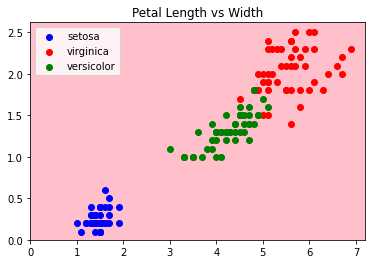

In [11]:
# petal_length vs petal_width class
pp.scatter(x = setosa['petal_length'], y = setosa['petal_width'], color = 'b')
pp.scatter(x = virginica['petal_length'], y = virginica['petal_width'], color = 'r')
pp.scatter(x = versicolor ['petal_length'], y = versicolor ['petal_width'], color = 'g')
pp.title("Petal Length vs Width")
pp.legend(['setosa', 'virginica', 'versicolor'])
pp.xlim(left = 0)
pp.ylim(bottom = 0)
pp.gca().set_facecolor('pink')
corrSS = stats.corr(setosa['petal_length'], setosa['petal_width'])
print(f'Correlation between Setosa Petal Length & Width ~> {corrSS}')

corrSVI = stats.corr(virginica['sepal_length'], virginica['petal_length'])
print(f'Correlation between Virginica Petal Length & Width ~> {corrSVI}')

corrSVE = stats.corr(versicolor['sepal_length'], versicolor['petal_length'])
print(f'Correlation between Versicolor Petal Length & Width ~> {corrSVE}')

We are 95% confident that the true mean of Sepal Length lies within [5.711257619469684, 5.975409047196983]
We are 95% confident that the true mean of Sepal Width lies within [2.9848421438029074, 3.123157856197093]
We are 95% confident that the true mean of Petal Length lies within [3.4772433857870686, 4.040089947546264]
We are 95% confident that the true mean of Petal Width lies within [1.0769432965790724, 1.3203900367542611]


/Users/samdish/.local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


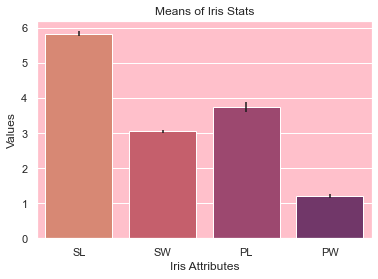

In [54]:
"""
#5 implementation;
"""
# get the means
SLM = iris['sepal_length'].mean()
SWM = iris['sepal_width'].mean()
PLM = iris['petal_length'].mean()
PWM = iris['petal_width'].mean()

# test
#print(SLM)
#print(SWM)
#print(PLM)
#print(PWM)

# get the se of each

SLse = stats.std(iris['sepal_length'])/math.sqrt(150)
SWse = stats.std(iris['sepal_width'])/math.sqrt(150)
PLse = stats.std(iris['petal_length'])/math.sqrt(150)
PWse = stats.std(iris['petal_width'])/math.sqrt(150)

# test
#print(SLse)
#print(SWse)
#print(PLse)
#print(PWse)

# build the 95% confidence interval and display
SLlow = SLM - (1.96 * SLse)
SLhigh = SLM + (1.96 * SLse)
print(f'We are 95% confident that the true mean of Sepal Length lies within [{SLlow}, {SLhigh}]')

SWlow = SWM - (1.96 * SWse)
SWhigh = SWM + (1.96 * SWse)
print(f'We are 95% confident that the true mean of Sepal Width lies within [{SWlow}, {SWhigh}]')

PLlow = PLM - (1.96 * PLse)
PLhigh = PLM + (1.96 * PLse)
print(f'We are 95% confident that the true mean of Petal Length lies within [{PLlow}, {PLhigh}]')

PWlow = PWM - (1.96 * PWse)
PWhigh = PWM + (1.96 * PWse)
print(f'We are 95% confident that the true mean of Petal Width lies within [{PWlow}, {PWhigh}]')

ax = s.barplot(['SL', 'SW', 'PL', 'PW'], [SLM, SWM, PLM, PWM], yerr = [SLse, SWse, PLse, PWse], capsize = 20, palette = 'flare', errcolor = 'white')
ax.set(title = "Means of Iris Stats")
ax.set(xlabel = "Iris Attributes")
ax.set(ylabel = "Values")
s.set(rc={'axes.facecolor':'pink', 'figure.facecolor':'white'})

In [51]:
"""
#6 implementation
"""
# SETOSA SECTION

# get the means
SSLM = setosa['sepal_length'].mean()
SSWM = setosa['sepal_width'].mean()
SPLM = setosa['petal_length'].mean()
SPWM = setosa['petal_width'].mean()

# test
#print(SLM)
#print(SWM)
#print(PLM)
#print(PWM)

# get the std error
SSLse = stats.std(setosa['sepal_length'])/math.sqrt(50)
SSWse = stats.std(setosa['sepal_width'])/math.sqrt(50)
SPLse = stats.std(setosa['petal_length'])/math.sqrt(50)
SPWse = stats.std(setosa['petal_width'])/math.sqrt(50)

# test
#print(SLse)
#print(SWse)
#print(PLse)
#print(PWse)

# build the 95% confidence interval and display
SSLlow = SSLM - (1.96 * SSLse)
SSLhigh = SSLM + (1.96 * SSLse)
print(f'We are 95% confident that the true mean of Setosa Sepal Length lies within [{SSLlow}, {SSLhigh}]')

SSWlow = SSWM - (1.96 * SSWse)
SSWhigh = SSWM + (1.96 * SSWse)
print(f'We are 95% confident that the true mean of Setosa Sepal Width lies within [{SSWlow}, {SSWhigh}]')

SPLlow = SPLM - (1.96 * SPLse)
SPLhigh = SPLM + (1.96 * SPLse)
print(f'We are 95% confident that the true mean of Setosa Petal Length lies within [{SPLlow}, {SPLhigh}]')

SPWlow = SPWM - (1.96 * SPWse)
SPWhigh = SPWM + (1.96 * SPWse)
print(f'We are 95% confident that the true mean of Setosa Petal Width lies within [{SPWlow}, {SPWhigh}]')

# VIRGINICA SECTION

# get the means
viSLM = virginica['sepal_length'].mean()
viSWM = virginica['sepal_width'].mean()
viPLM = virginica['petal_length'].mean()
viPWM = virginica['petal_width'].mean()

# test
#print(viSLM)
#print(viSWM)
#print(viPLM)
#print(viPWM)

# get the std error
viSLse = stats.std(virginica['sepal_length'])/math.sqrt(50)
viSWse = stats.std(virginica['sepal_width'])/math.sqrt(50)
viPLse = stats.std(virginica['petal_length'])/math.sqrt(50)
viPWse = stats.std(virginica['petal_width'])/math.sqrt(50)

# test
#print(viSLse)
#print(viSWse)
#print(viPLse)
#print(viPWse)

# build the 95% confidence interval and display
viSLlow = viSLM - (1.96 * viSLse)
viSLhigh = viSLM + (1.96 * viSLse)
print(f'\n\nWe are 95% confident that the true mean of Virginica Sepal Length lies within [{viSLlow}, {viSLhigh}]')

viSWlow = viSWM - (1.96 * viSWse)
viSWhigh = viSWM + (1.96 * viSWse)
print(f'We are 95% confident that the true mean of Virginica Sepal Width lies within [{viSWlow}, {viSWhigh}]')

viPLlow = viPLM - (1.96 * viPLse)
viPLhigh = viPLM + (1.96 * viPLse)
print(f'We are 95% confident that the true mean of Virginica Petal Length lies within [{viPLlow}, {viPLhigh}]')

viPWlow = viPWM - (1.96 * viPWse)
viPWhigh = viPWM + (1.96 * viPWse)
print(f'We are 95% confident that the true mean of Virginica Petal Width lies within [{viPWlow}, {viPWhigh}]')

# VERSICOLOR SECTION

# get the means
veSLM = versicolor['sepal_length'].mean()
veSWM = versicolor['sepal_width'].mean()
vePLM = versicolor['petal_length'].mean()
vePWM = versicolor['petal_width'].mean()

# test
#print(veSLM)
#print(veSWM)
#print(vePLM)
#print(vePWM)

# get the std error
veSLse = stats.std(versicolor['sepal_length'])/math.sqrt(50)
veSWse = stats.std(versicolor['sepal_width'])/math.sqrt(50)
vePLse = stats.std(versicolor['petal_length'])/math.sqrt(50)
vePWse = stats.std(versicolor['petal_width'])/math.sqrt(50)

# test
#print(veSLse)
#print(veSWse)
#print(vePLse)
#print(vePWse)

# build the 95% confidence interval and display
veSLlow = veSLM - (1.96 * veSLse)
veSLhigh = veSLM + (1.96 * veSLse)
print(f'\n\nWe are 95% confident that the true mean of Versicolor Sepal Length lies within [{veSLlow}, {veSLhigh}]')

veSWlow = veSWM - (1.96 * veSWse)
veSWhigh = veSWM + (1.96 * veSWse)
print(f'We are 95% confident that the true mean of Versicolor Sepal Width lies within [{veSWlow}, {veSWhigh}]')

vePLlow = vePLM - (1.96 * vePLse)
vePLhigh = vePLM + (1.96 * vePLse)
print(f'We are 95% confident that the true mean of Versicolor Petal Length lies within [{vePLlow}, {vePLhigh}]')

vePWlow = vePWM - (1.96 * vePWse)
vePWhigh = vePWM + (1.96 * vePWse)
print(f'We are 95% confident that the true mean of Versicolor Petal Width lies within [{vePWlow}, {vePWhigh}]')

We are 95% confident that the true mean of Setosa Sepal Length lies within [4.909276829828629, 5.102723170171371]
We are 95% confident that the true mean of Setosa Sepal Width lies within [3.313446905201233, 3.5225530947987673]
We are 95% confident that the true mean of Setosa Petal Length lies within [1.4163885378506393, 1.5116114621493606]
We are 95% confident that the true mean of Setosa Petal Width lies within [0.21458171235438744, 0.27341828764561255]


We are 95% confident that the true mean of Virginica Sepal Length lies within [6.413514639605494, 6.7624853603945025]
We are 95% confident that the true mean of Virginica Sepal Width lies within [2.8855069224854284, 3.062493077514572]
We are 95% confident that the true mean of Virginica Petal Length lies within [5.400560095509803, 5.703439904490198]
We are 95% confident that the true mean of Virginica Petal Width lies within [1.9506360247332988, 2.1013639752667017]


We are 95% confident that the true mean of Versicolor Sepal Lengt

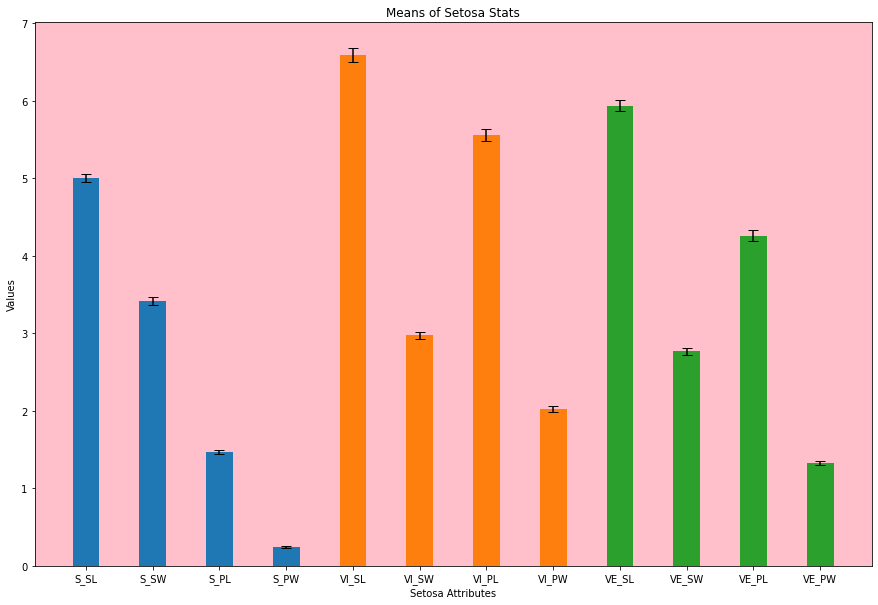

In [14]:
# plot them all
pp.bar(['S_SL', 'S_SW', 'S_PL', 'S_PW'], [SSLM, SSWM, SPLM, SPWM], yerr = [SSLse, SSWse, SPLse, SPWse], capsize = 5, width = 0.4)
pp.bar(['VI_SL', 'VI_SW', 'VI_PL', 'VI_PW'], [viSLM, viSWM, viPLM, viPWM], yerr = [viSLse, viSWse, viPLse, viPWse], capsize = 5, width = 0.4)
pp.bar(['VE_SL', 'VE_SW', 'VE_PL', 'VE_PW'], [veSLM, veSWM, vePLM, vePWM], yerr = [veSLse, veSWse, vePLse, vePWse], capsize = 5, width = 0.4)
pp.title("Means of Setosa Stats")
pp.xlabel("Setosa Attributes")
pp.ylabel("Values")
pp.gcf().set_size_inches(15,10)
pp.gca().set_facecolor('pink')

## #7;

In general, we can say that all lengths are greater than all their corresponding widths. _i.e._ Petal & Sepal Lengths are on average, larger than Petal & Sepal Widths, respectively. For my hypothesis, I'm going to declare that a **Setosa's Petal Length** is *larger* than **Versicolor's Petal Length**. 

The p_value is ~> 0.000704, thus we reject my null hypothesis.


(0.0, 5.304999999999999)

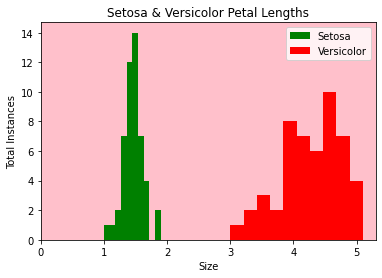

In [15]:
p_value = stats.two_sided_p(SPLM, vePLM, stats.std(iris['sepal_length'].values))
print(f'The p_value is ~> {round(p_value,6)}, thus we reject my null hypothesis.')

pp.hist(setosa['petal_length'], bins = 10, color = 'g')
pp.hist(versicolor['petal_length'], bins = 10, color = 'r')
pp.title("Setosa & Versicolor Petal Lengths")
pp.xlabel("Size")
pp.ylabel("Total Instances")
pp.legend(['Setosa', 'Versicolor'])
pp.gca().set_facecolor('pink')
pp.xlim(left = 0)

# #7 A)

Both graphs appear to be normal. Setosa is better off than Versicolor, but they both seem to agree with the *CLT*. To top it off, both have samples sizes of $n > 30$, so that reinforces *CLT* even more

# #7 B)

It is close to normal, therefore my p_value is an accurate representation of the data. 